# 確率分布を理解する

## 離散分布と連続分布

### くじ引き問題の確率分布の可視化 Program

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb
import japanize_matplotlib

plt.style.use('ggplot')

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

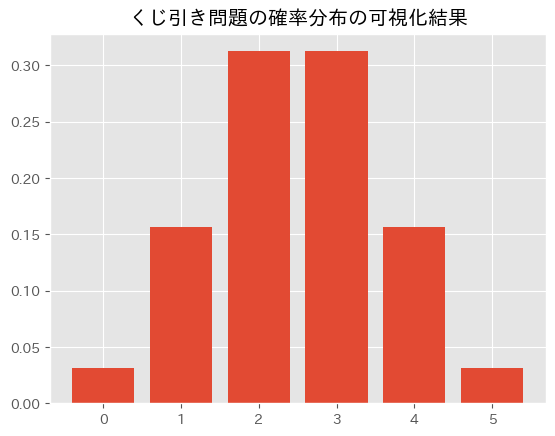

In [2]:
# くじ引き問題の確率分布の可視化 Program (n=5)
n = 5
x = range(n + 1)
y = [comb(n, i) / 2 ** n for i in x]
plt.bar(x, y)
plt.title('くじ引き問題の確率分布の可視化結果')

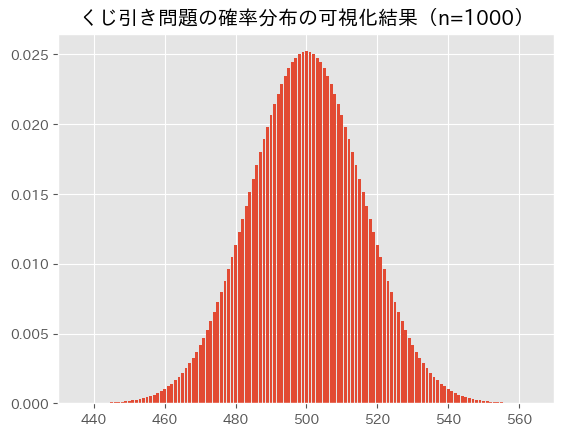

In [3]:
# くじ引き問題の確率分布の可視化 Program (n=1000)
n = 1_000
x = range(n + 1)
y = [comb(n, i) / 2**n for i in x]
plt.bar(x, y)
plt.xlim(430, 570)
plt.title('くじ引き問題の確率分布の可視化結果（n=1000）');

In [4]:
import numpy as np

In [5]:

# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma) ** 2 / 2) / (np.sqrt(2 * np.pi) * sigma)

Text(0.5, 1.0, '確率分布と正規分布関数の重ね描き')

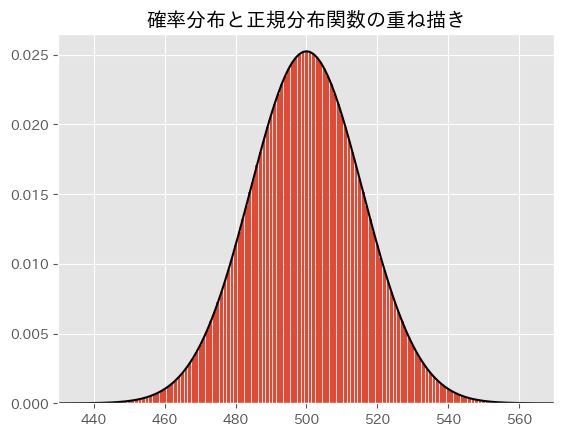

In [6]:
# 確率分布と正規分布関数の重ね描き
n = 1000

# Graph 描画
plt.xlim(430, 570)
x = np.arange(430, 571)

# 確率分布の Graph描画
y1 = [comb(n, i) / 2 ** n for i in x]
plt.bar(x, y1)

# 正規分布関数の Graph描画
mu = n / 2
sigma = np.sqrt(mu / 2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, color='k')

plt.title('確率分布と正規分布関数の重ね描き')

## PyMC いよる確率 Model 定義と Sampling

In [7]:
# Bayes 推論で必要な２つの Libray を import
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.7.2
Running on ArviZ v0.15.1


In [8]:
# 確率 Model 定義

# 確率 Model-context 用 Instance
model = pm.Model()

# 先ほど定義した Instance を with 文で指定
with model:
    # Binomial: 二項分布の確率分布Class
    # p: 二項分布の元になる施行の回数
    # n: 二項分布における施行階数
    # 'x': Sample として出力される確率変数
    x = pm.Binomial('x', n=5, p=0.5)

In [9]:
# Sampling

# with model の Context 定義により、上で定義した確率 Model と紐づけられる
# sample_prior_predictive: 事前分布の予測値取得関数
# 乱数により生成された Sample値が変数 prior_samples に Set される
with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


### Sampling 結果分析

In [10]:
# Notebook UI を直接利用
prior_samples

Inference data with groups:
	> prior

#### Dimensions
Sample data が全部でいくつあるのかを示している。
    - chain: Sample data が何系列存在するか。（※事前分布では意味がないので必ず１になる。）
    - draw: 同一系列内の Sample Data 数

#### Data variables
生成した Sample そのものを見ることができる。
今回の場合、下の階層に「x」という Label があり確率 Model を定義した時の `pm.Binomial('x', n=5, p=0.5)` の 'x'と対応している。

In [11]:
import pandas as pd

In [12]:
# NumPy 形式 Data を抽出

# 事前分布（prior）としての Sample値を取得
x_samples = prior_samples['prior']['x'].values  # NumPy形式 Data の抽出
    # Sample data に複数の確率変数が含まれている場合、['x'] の部分を他の確率変数Label に差し替えると対象の確率変数の値が取得できる。
print('type:', type(x_samples))  # Data の型の確認
print('shape:', x_samples.shape)  # Data size の確認
print('values:', x_samples, '\n')  # Data の値の確認

# 通常の NumPy Data として頻度分析をした例
value_counts = pd.DataFrame(x_samples.reshape(-1)).value_counts().sort_index()  # 確率変数値別の件数を Count
print(value_counts)

type: <class 'numpy.ndarray'>
shape: (1, 500)
values: [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 

In [13]:
# ArViZ による分析

summary = az.summary(prior_samples, kind='stats')
    # kind='stats' を指定することで統計分析だけを実施。
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


- mean: 平均
- sd: 標準偏差
- hdi_3%, hdi_97%: highest density interval の略。ざっくりいうと信頼区間と似たような概念

Text(0.5, 1.0, 'ArivZ による Sample値の可視化結果')

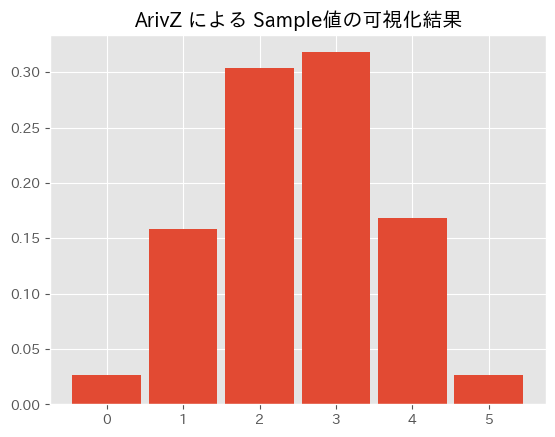

In [14]:
# ArviZ による可視化
ax = az.plot_dist(x_samples)
ax.set_title('ArivZ による Sample値の可視化結果')

ArviZ では、NumPy 形式の引数を使う関数もあるが、多くの場合、PyMC の Sampling結果の変数を丸ごと引数として使用する。

## 確率分布と PyMC Programing の関係

In [15]:
# 確率 Model 定義
model = pm.Model()

with model:
    x = pm.Binomial('x', p=0.5, n=5)
    prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values

Sampling: [x]


数学概念と PyMC Programing model の関係

数学概念 | 具体例 | PyMC Programing Model
--- | --- | ---
分布関数 | $ {}_5 \mathrm{C}_k \cdot p^k(1 - p)^{5-k} $ | pm.Binomial Class
確率分布 | | `pm.Binomial('x', p=0.5, n=5)` <br> (確率 Model 定義式の右辺)
確率変数 | x <br> (５回くじを引いた時の当たりの数) | x <br> (確率 Model 定義式の左辺)
Sample値 | ２ | `prior_samples['prior']['x'].values`


# よく利用される確率分布

今回説明する確率分布

確率分布名 | PyMC Class名 | 離散・連続 
--- | --- | ---
ベルヌーイ分布 | `pm.Bernoulli` | 離散分布
二項分布 | `pm.Binomial` | 離散分布
正規分布 | `pm.Normal` | 連続分布
一様分布 | `pm.Uniform` | 連続分布
ベータ分布 | `pm.Beta` | 連続分布
半正規分布 | `pm.HalfNormal` | 連続分布

## ベルヌーイ分布 (`pm.Bernoulli` Class)
$$
P(X=k) = p^k \cdot (1-p)^{1-k}
$$

In [16]:
# ベルヌーイ分布の確率 Model 定義

# Parameter設定
p = 0.5

model1 = pm.Model()
with model1:
    # pm.Bernoulli: ベルヌーイ分布
    # p: 当たる確率
    x = pm.Bernoulli('x', p=p)

In [17]:
# 事前分布の Sampling

with model1:
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [18]:
# NumPy 形式の Sample値
x_samples1 = prior_samples1['prior']['x'].values
print(x_samples1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [21]:
# Sampling 結果の
summary1 = az.summary(prior_samples1, kind='stats')
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.5,0.0,1.0


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5')

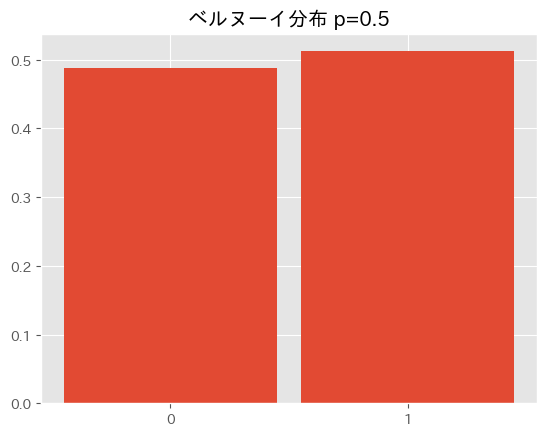

In [22]:
# Sampling結果の可視化
ax = az.plot_dist(x_samples1)
ax.set_title(f'ベルヌーイ分布 p={p}')

得られた Sampling結果
確率0.5で当たりのでるくじ引きにおいて、当たり(1)、はずれ(0) で表現した確率変数の Sample値として妥当

## 二項分布（pm.Binomial Class）
### 二項分布を示す数式
$$
P(X = k) = {}_n\mathrm{C}_k \cdot p^k(1 - p)^{n-k}
$$

In [23]:
# 二項分布の確率 Model の定義

# Parameter設定
p = 0.5
n = 5

model2 = pm.Model()
with model2:
    # pm.Binomial: 二項分布
    # p: 施行が成功する確率
    # n: 施行回数
    x = pm.Binomial('x', p=p, n=n)

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


Text(0.5, 1.0, '二項分布 p= 0.5 n=5')

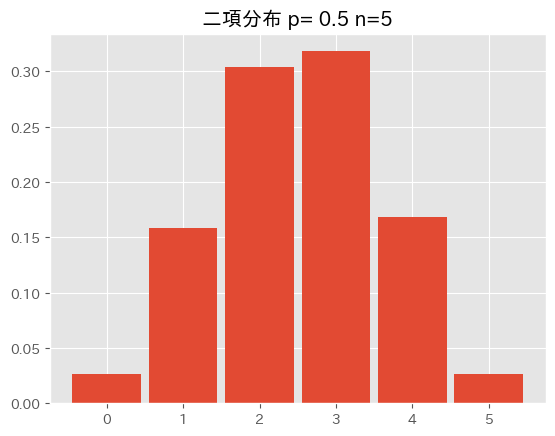

In [25]:
# Sampling と結果分析
with model2:
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)  # Sampling

# Sample値抽出
x_samples2 = prior_samples2['prior']['x'].values
print(x_samples2)

# Sampling結果の統計分析
summary2 = az.summary(prior_samples2, kind='stats')
display(summary2)

# Sampling結果の可視化
ax = az.plot_dist(x_samples2)
ax.set_title(f'二項分布 p= {p} n={n}')

- $n = 5$ の場合、確率変数 $X$ の値は、0 ~ 5 までの整数。
- 平均値は、2.5 に近い。
- 棒グラフの結果から、2 と 3 の出現頻度が高い。

Sampling: [x]


[[30 30 29 23 31 22 34 27 21 24 26 22 23 30 25 20 30 17 27 25 22 24 28 29
  20 26 21 26 27 28 23 26 20 26 28 27 18 29 27 19 22 29 26 21 27 28 23 19
  20 25 25 22 24 31 29 26 31 26 29 27 32 30 26 24 27 25 26 20 19 23 20 24
  19 21 26 25 25 28 26 28 20 20 27 26 22 24 24 25 25 26 25 22 20 27 24 18
  26 29 24 23 24 27 22 28 29 30 19 30 32 28 19 28 26 26 22 27 25 24 25 27
  23 26 27 30 30 20 28 26 28 26 27 30 26 32 28 26 27 23 31 27 26 23 28 26
  25 29 20 28 25 30 27 20 29 28 26 30 23 28 32 24 18 27 24 24 23 25 17 16
  24 20 25 30 21 24 26 22 27 27 28 26 23 21 25 24 22 30 23 26 26 22 24 24
  21 26 21 21 26 22 28 19 27 31 26 24 23 22 24 20 24 25 22 29 28 22 23 30
  27 25 28 23 17 25 26 31 28 27 29 24 27 26 24 25 27 22 29 25 20 26 23 29
  30 27 29 21 32 22 26 23 22 27 27 29 25 20 22 29 23 24 25 20 27 25 28 23
  24 31 22 24 24 29 25 22 26 25 28 25 24 27 21 22 22 24 19 29 27 34 19 26
  26 24 19 30 25 20 21 25 27 32 25 26 19 26 34 28 24 25 25 25 19 29 26 28
  28 27 26 25 23 21 24 24 22 25 30 22 

,mean,sd,hdi_3%,hdi_97%
x,24.998,3.456,18.0,30.0


Text(0.5, 1.0, '二項分布 p=0.5 n=50')

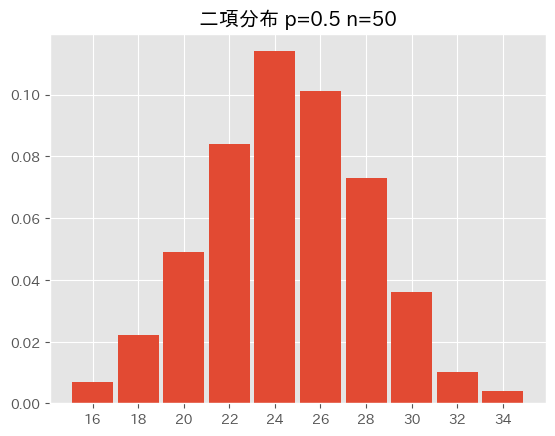

In [26]:
# 二項分布の確率モデル定義

# Parameter設定
p = 0.5
n = 50

model3 = pm.Model()
with model3:
    # pm.Binomial: 二項分布
    # p: 施行が成功する確率
    # n: 施行階数
    x = pm.Binomial('x', p=p, n=n)

    # Sampling
    prior_samples3 = pm.sample_prior_predictive(random_seed=42)

# Sample値の抽出
x_samples3 = prior_samples3['prior']['x'].values
print(x_samples3)

# Sampling結果の統計分析
summary3 = az.summary(prior_samples3, kind='stats')
display(summary3)

# Sampling結果の可視化
ax = az.plot_dist(x_samples3)
ax.set_title(f'二項分布 p={p} n={n}')

- 理屈の上では、Sample値が 0 や 50 になることもありえるが、実際にはそのような結果は一切なし。
- Sample値の分布が最小値16, 最大値34 と理論上の平均値25.0 に近い領域に集中。

一般的に二項分布は $n$ の値を大きくすることで、棒グラフの形状が釣鐘型に近づく（※正規分布と関係している。）

## 正規分布（pm.Normal Class）
自然界で Romdom な連続値をとる観測値に対して、近似できることの多い確率分布。
Byes推論で、**事前分布を示す確率 Model として非常によく用いられる。**

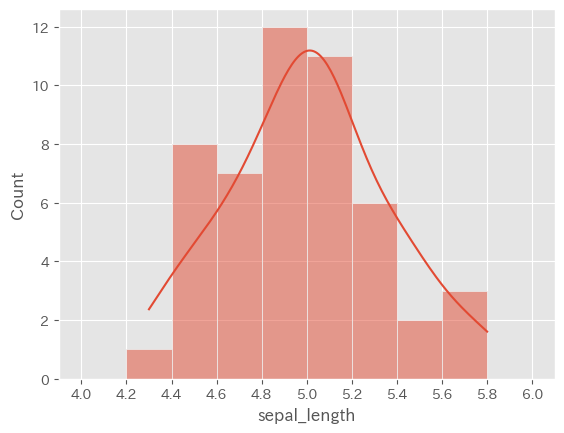

In [29]:
# Iris-Dataset から、setosa という種類の花のがく片長（sepal_length）の分布を調査
import seaborn as sns

# Iris-Dataset の読み込み
df = sns.load_dataset('iris')

# setosa の行のみ抽出
df_setosa = df[df['species']=='setosa']

bins = np.arange(4.0, 6.2, 0.2)
# 分布の確認
sns.histplot(df_setosa, x='sepal_length', bins=bins, kde=True)
plt.xticks(bins)
plt.show()

カーネル密度推定（KDE: Kernel density estimation）の曲線グラフの形状が釣鐘型になっている。このような場合、ほとんどのケースで正規分布で近似することが可能。

## 正規分布の確率密度関数（正規分布関数）
$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma}} \exp \left( {- \frac{(x - \mu)^2}{2 \sigma^2}} \right)
$$

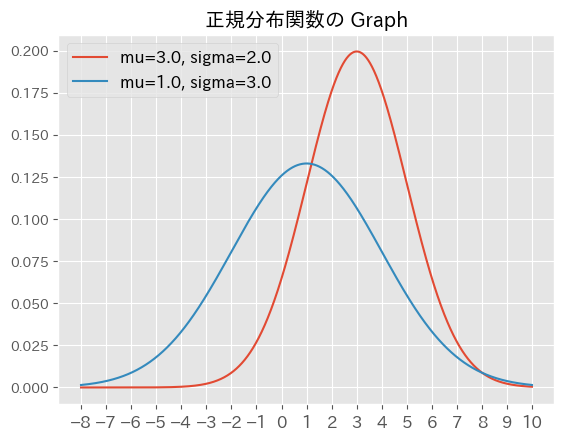

In [30]:
# 正規分布関数の定義と Graph描画

# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma) ** 2 / 2) / (np.sqrt(2 * np.pi) * sigma)

# Parameter定義
mu1, sigma1 = 3.0, 2.0
mu2, sigma2 = 1.0, 3.0

# Graph描画用 x座用の定義
# ２つの正規分布関数で ± 3sigma まで入るように計算
x = np.arange(-8.0, 10.0, 0.01)

# x軸目盛の設定
xticks = np.arange(-8.0, 11.0, 1.0)

# Graph描画
plt.plot(x, norm(x, mu1, sigma1), label=f'mu={mu1}, sigma={sigma1}')
plt.plot(x, norm(x, mu2, sigma2), label=f'mu={mu2}, sigma={sigma2}')
plt.xticks(xticks, fontsize=12)
plt.legend(fontsize=12)
plt.title(f'正規分布関数の Graph')
plt.show()

- 平均 $\mu$ を対象の軸とした釣鐘型の Graph
- バラツキの大きさ（裾の長さ）は標準偏差 $\sigma$ で規定される

In [31]:
# PyMC による正規分布の確率 Model 定義

# parameter設定
mu = 0.0
sigma = 1.0

model_norm = pm.Model()
with model_norm:
    # pm.Normal: 正規分布
    # mu: 平均
    # sigma: 標準偏差
    x = pm.Normal('x', mu=mu, sigma=sigma)

Sampling: [x]


[[ 0.41832997  0.60557617  0.02878786 -1.084246    1.46422098  0.29072736
  -1.33075642 -0.03472346  0.28041847  0.10749307 -1.92080086  1.57864499
   1.00595719  0.45121505 -0.59343367  0.09382112  1.85195867 -0.25590475
  -0.28298637  0.415816   -1.08877401 -1.96729165  0.88737846 -1.32823784
  -0.13157981 -0.36196929  0.7820311   0.28266399 -1.00595013  0.01851214
  -1.24315953  2.60337585  0.15139223 -0.51553062 -0.2196374   0.40234591
   1.36128828  0.74287737  0.93685218  0.17547031  1.52520418  0.09821447
  -1.16490357  0.52358791 -1.06559789 -0.31079113  0.5559524  -0.09963476
  -0.25769078 -1.58951869 -1.81491229  0.53617305  1.27138979 -0.55403891
   1.72433064 -0.31178569  0.06331837  1.38212765  0.58472813 -0.50975014
   0.2513335   0.40621724  0.8656376  -0.53392518 -0.03877829  1.14263416
  -0.46350628  2.26692259 -0.5287392   0.32461586 -0.1544165  -0.81960771
  -1.20293573  0.09544837 -1.3617434   0.27737016  0.30665917 -1.40419209
  -1.53897176  1.59692719  1.26835706 

Text(0.5, 1.0, '正規分布 mu=0.0 sigma=1.0')

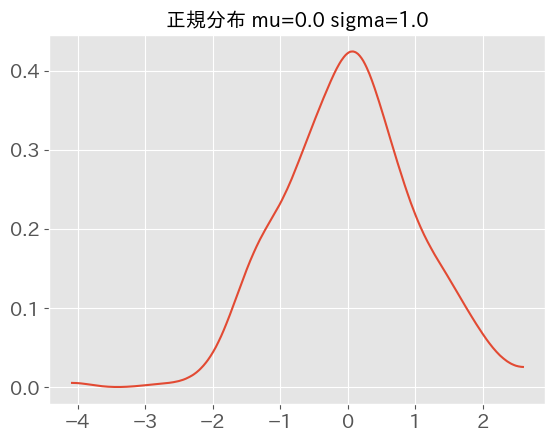

In [32]:
# Sampling & Sampling結果の分析
with model_norm:
    # Sampling
    prior_samples_norm = pm.sample_prior_predictive(random_seed=42)
    
# Sample値抽出
x_samples_norm = prior_samples_norm['prior']['x'].values
# 桁数が多いので先頭100個のみ出力
print(x_samples_norm[:, :100])

# Sample結果の可視化
ax = az.plot_dist(x_samples_norm)
ax.set_title(f'正規分布 mu={mu} sigma={sigma}')

`az.plot_dist()` 関数は、数値が Random な浮動小数点である場合は、**Sample値は連続分布から生成された** と判断し自動的に連続関数で近似した関数Graph で表示する。

Text(0.5, 1.0, '正規分布 mu=0.0 sigma=1.0')

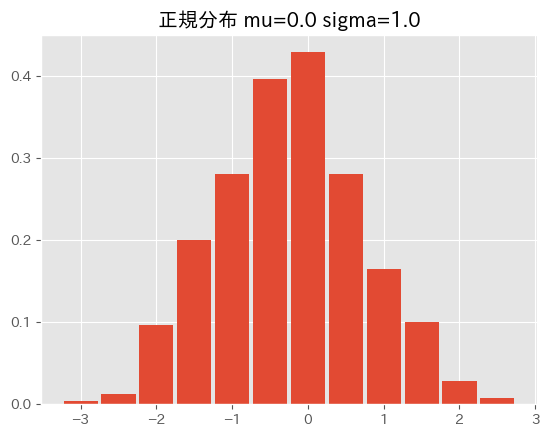

In [33]:
# Sampling 結果の Histogram 表示
bins = np.arange(-3, 3.5, 0.5)
ax = az.plot_dist(x_samples_norm, kind='hist', hist_kwargs={'bins': bins})
plt.xticks(np.arange(-3, 4, 1))
ax.set_title(f'正規分布 mu={mu} sigma={sigma}')

In [35]:
# Sampling結果の統計分析
summary_norm = az.summary(prior_samples_norm, kind='stats')
display(summary_norm)

,mean,sd,hdi_3%,hdi_97%
x,0.009,0.963,-1.59,1.9


- 乱数の要素があるため完全一致しないが $\mu = 0.0$ $\sigma = 1.0$ の Parameter設定に近似した結果が得られた。
- $\mu=0.0$ $\sigma=1.0$ の正規分布の理想的 hdi（下限値-1.88, 上限値=1.88）と比較して多少のブレはあるものの近似した結果が得られた。

Sampling: [x]


[[ 3.83665993  4.21115235  3.05757572  0.831508    5.92844195  3.58145471
   0.33848716  2.93055308  3.56083695  3.21498614 -0.84160171  6.15728998
   5.01191438  3.90243009  1.81313266  3.18764224  6.70391734  2.4881905
   2.43402725  3.83163201  0.82245197 -0.9345833   4.77475692  0.34352432
   2.73684039  2.27606141  4.56406221  3.56532797  0.98809973  3.03702427
   0.51368095  8.20675171  3.30278446  1.96893877  2.5607252   3.80469182
   5.72257657  4.48575474  4.87370435  3.35094062  6.05040837  3.19642895
   0.67019287  4.04717581  0.86880422  2.37841773  4.1119048   2.80073048
   2.48461844 -0.17903738 -0.62982457  4.07234609  5.54277957  1.89192218
   6.44866128  2.37642862  3.12663674  5.7642553   4.16945625  1.98049972
   3.502667    3.81243448  4.73127521  1.93214964  2.92244343  5.28526831
   2.07298744  7.53384519  1.9425216   3.64923171  2.691167    1.36078457
   0.59412855  3.19089675  0.2765132   3.55474032  3.61331834  0.19161582
  -0.07794351  6.19385438  5.53671412  

Text(0.5, 1.0, '正規分布 mu=3.0 sigma=2.0')

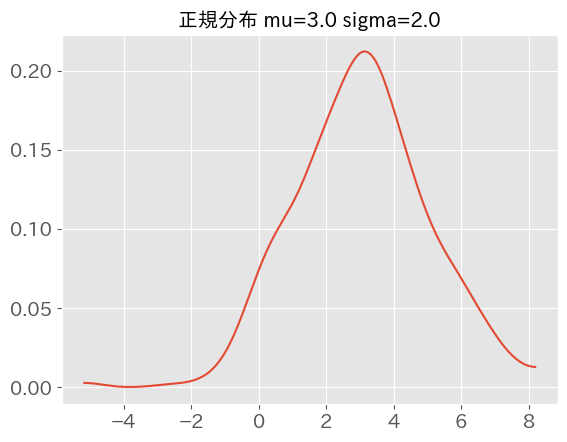

In [36]:
# 正規分布関数の確率 Model 定義

# Parameter
mu = 3.0
sigma = 2.0

model_norm_2 = pm.Model()
with model_norm_2:
    x = pm.Normal('x', mu=mu, sigma=sigma)
    
    # Samplring
    prior_samples_norm_2 = pm.sample_prior_predictive(random_seed=42)

# Sampling値抽出
x_samples_norm_2 = prior_samples_norm_2['prior']['x'].values
# 先頭100個のみ出力
print(x_samples_norm_2[:, :100])

# Sampling結果の可視化
ax = az.plot_dist(x_samples_norm_2)
ax.set_title(f'正規分布 mu={mu} sigma={sigma}')


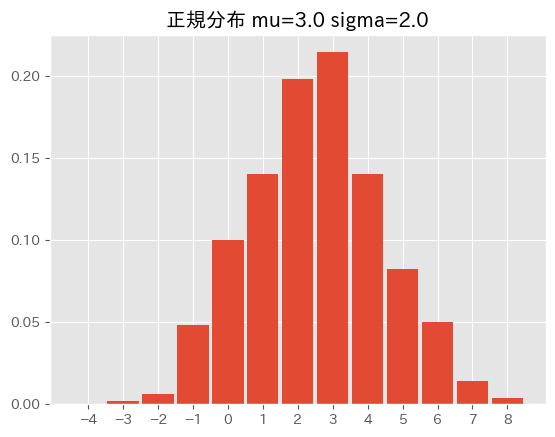

In [42]:
# Sampling 結果の Histogram 表示
bins = np.arange(-4, 10, 1)
ax = az.plot_dist(x_samples_norm_2, kind='hist', hist_kwargs={'bins': bins})
plt.xticks(np.arange(-4, 9, 1))
ax.set_title(f'正規分布 mu={mu} sigma={sigma}')
plt.show()

In [43]:
summary_norm_2 = az.summary(x_samples_norm_2, kind='stats')
display(summary_norm_2)

,mean,sd,hdi_3%,hdi_97%
x,3.018,1.927,-0.18,6.801


PyMC で生成した確率 Model の Parameter($\mu = 3.0$, $\sigma=2.0$)でほぼ意図したとおりの統計値になっている。

## 一様分布（pm.Uniform Class）
- 連続分布
- 確率 Model 定義時の事前分布として用いられることが多い。
    1. 確率値と確率変数とする確率分布を考えた時に、確率分布の種類、その確率分布の Parameter に関数手がかりが一切ない。
    2. 上記の場合、「０から１までの値の可能性はすべて同等に確からしい」とする考え方がある。
    3. 上記の考え方を確率分布に当てはめると一様分布になる。
- 自然界で確率変数が一様分布になる事象は、ほとんどない。

#### 一様分布の確率密度関数
$$
f(x) = \frac{1}{b - a} \qquad a \leq x < b
$$

確率変数数値を $x$ としているが、関数定義の式に $x$ は含まれず定数関数となっている。

In [44]:
# 一様分布の確率 Model 定義

# Parameter
lower = 0.0
upper = 1.0

model_uniform = pm.Model()
with model_uniform:
    # pm.Uniform: 一様分布
    # lower: 下限値
    # upper: 上限値
    x = pm.Uniform('x', lower=lower, upper=upper)

Sampling: [x]


[[0.91674416 0.91098667 0.8765925  0.30931841 0.95465607 0.17509458
  0.99662814 0.75203348 0.15038118 0.38334205 0.57929755 0.17545841
  0.24936317 0.92789618 0.45043938 0.08049801 0.92897428 0.0145879
  0.74506917 0.50817951 0.16114111 0.42722995 0.80989887 0.85133696
  0.06946216 0.57816756 0.13495204 0.55863526 0.72404236 0.77635178
  0.31264508 0.62936681 0.07600455 0.61244242 0.76271682 0.66850046
  0.01788179 0.89393369 0.68119886 0.05815091 0.21322457 0.88236378
  0.62095282 0.13583653 0.72843457 0.78909839 0.31787272 0.03725282
  0.07792079 0.50836923 0.51707609 0.22624359 0.34760498 0.9562864
  0.8728551  0.57262446 0.95135519 0.65216825 0.88258962 0.69665684
  0.98336328 0.92885887 0.64555302 0.40866512 0.70908829 0.55270282
  0.62742591 0.07837106 0.04155039 0.24832439 0.067527   0.38937433
  0.03959853 0.10557087 0.61048682 0.51127382 0.48346119 0.76838016
  0.63992093 0.82725158 0.0802972  0.0715233  0.73349723 0.56197244
  0.19509539 0.41326536 0.39160485 0.45042795 0.50

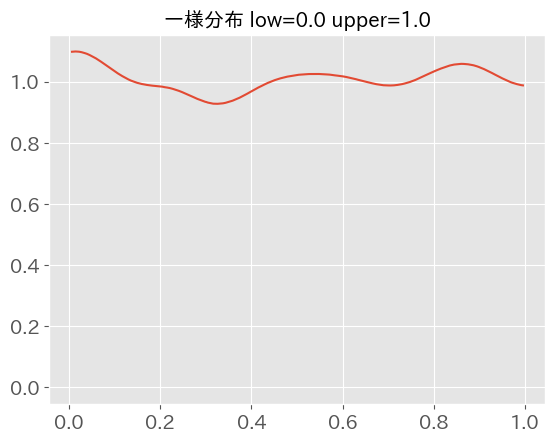

In [45]:
# 一様分布の sampling と結果分析
with model_uniform:
    prior_samples_uniform = pm.sample_prior_predictive(random_seed=42)
    
# Sample値抽出
x_samples_uniform = prior_samples_uniform['prior']['x'].values
print(x_samples_uniform[:, :100])

# Sampling結果の可視化
ax = az.plot_dist(x_samples_uniform)
ax.set_title(f'一様分布 low={lower} upper={upper}')
plt.show()

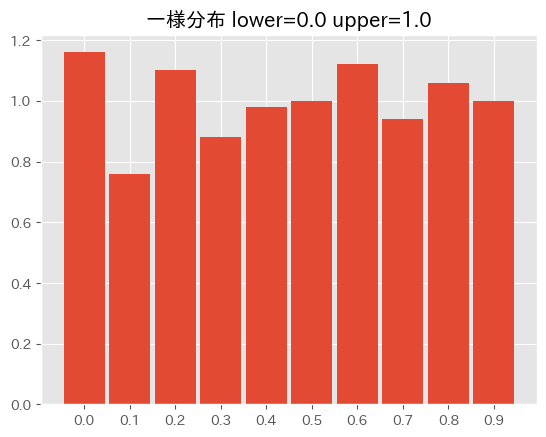

In [46]:
# Sampling結果の Histogram表示
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples_uniform, kind='hist', hist_kwargs={'bins': bins})
ax.set_title(f'一様分布 lower={lower} upper={upper}')
plt.show()

多少のバラツキはあるが、どの範囲にもほぼ均等に Sample がある。

In [47]:
# Sampling結果の統計分析
summary_uniform = az.summary(x_samples_uniform, kind='stats')
display(summary_uniform)

,mean,sd,hdi_3%,hdi_97%
x,0.502,0.289,0.037,0.956


区間[0, 1] の一様分布の理論上の平均値（0.5）と標準偏差（$1 / 2\sqrt{3} = 0.28867...$）とほぼ一致している。

Sampling: [x]


[[0.83339533 0.82878933 0.801274   0.34745473 0.86372486 0.24007566
  0.89730251 0.70162678 0.22030495 0.40667364 0.56343804 0.24036673
  0.29949054 0.84231694 0.46035151 0.1643984  0.84317942 0.11167032
  0.69605533 0.50654361 0.22891289 0.44178396 0.74791909 0.78106957
  0.15556973 0.56253405 0.20796163 0.54690821 0.67923388 0.72108142
  0.35011607 0.60349345 0.16080364 0.58995394 0.71017345 0.63480037
  0.11430543 0.81514695 0.64495909 0.14652073 0.27057966 0.80589103
  0.59676226 0.20866923 0.68274766 0.73127871 0.35429817 0.12980226
  0.16233663 0.50669539 0.51366087 0.28099487 0.37808398 0.86502912
  0.79828408 0.55809957 0.86108415 0.6217346  0.8060717  0.65732547
  0.88669063 0.8430871  0.61644242 0.4269321  0.66727063 0.54216225
  0.60194073 0.16269685 0.13324031 0.29865951 0.1540216  0.41149947
  0.13167882 0.18445669 0.58838946 0.50901906 0.48676895 0.71470413
  0.61193674 0.76180126 0.16423776 0.15721864 0.68679778 0.54957795
  0.25607631 0.43061229 0.41328388 0.46034236 0.

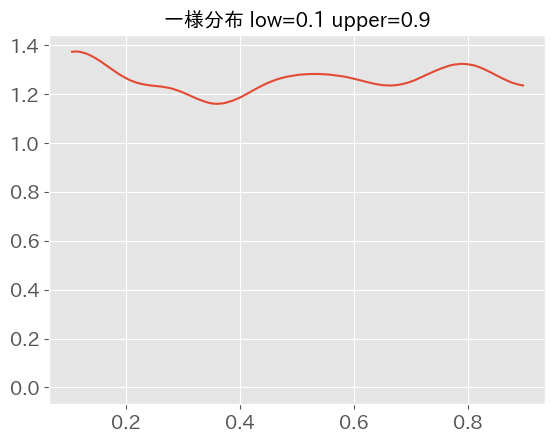

In [48]:
# 一様分布の確率 Model 定義（下限値: 0.1, 上限値: 0.9）と Sampling結果分析

# Parameter
lower = 0.1
upper = 0.9

model_uniform_2 = pm.Model()
with model_uniform_2:
    x = pm.Uniform('x', lower=lower, upper=upper)
    
    # Sampling
    prior_samples_uniform_2 = pm.sample_prior_predictive(random_seed=42)

# Sample値抽出
x_samples_uniform_2 = prior_samples_uniform_2['prior']['x'].values
print(x_samples_uniform_2[:, :100])

# Sample結果の可視化
ax = az.plot_dist(x_samples_uniform_2)
ax.set_title(f'一様分布 low={lower} upper={upper}')
plt.show()

前回含まれていた 0.0..や 0.9.. の値が一切なくなっていることがわかる

# ベータ分布（pm.Beta Class）
- 連続分布
- 統計学の知識が前提となる
- 確率値を目的変数とした確率分布

#### ベータ分布の確率密度関数（ベータ関数）
$$
f(p) = C \cdot p^{\alpha-1}(1-p)^{\beta - 1}
$$
$$
C = \frac{(\alpha + \beta - 1)!}{(\alpha-1)!(\beta - 1)!}
$$


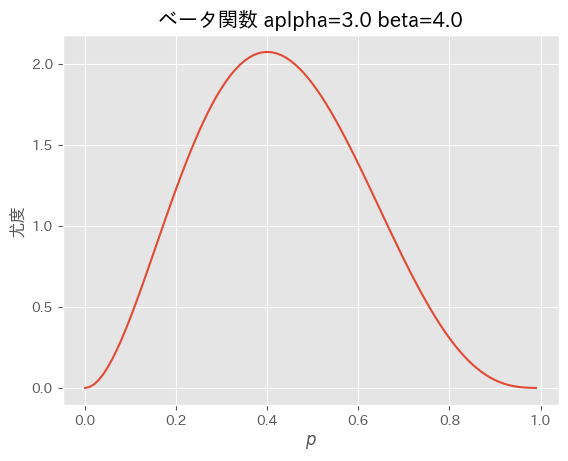

In [49]:
from math import gamma

# Parameter
alpha = 2.0 + 1.0
beta = 3.0 + 1.0


# ベータ関数の定義
def Beta(p, alpha, beta):
    C = gamma(alpha + beta - 1) / (gamma(alpha - 1) * gamma(beta - 1))
    return C * p ** (alpha - 1) * (1 - p) ** (beta - 1)

# Graph描画用の x 座標の定義
# 0.0 < p < 1.0
p = np.arange(0.0, 1.0, 0.01)

# Graph描画
plt.plot(p, Beta(p, alpha, beta))
plt.title(f'ベータ関数 aplpha={alpha} beta={beta}')
plt.xlabel(r'$p$')
plt.ylabel('尤度')
plt.show()

- Graph の peak が 0.4 にある。
- 尤度（施行が成功する確率$p$の確からしさ）
より、「$p = 0.4$がもっとも確からしい確率値である」ことを Graph は示している。

施行の成功数(alpha)=２回、施行の失敗数(beta)=３回なので、施行の成功する確率は $2 / 5 = 0.4$ という直感的な予想とあっている。

In [50]:
# ベータ分布の確率 Model 定義

# Parameter
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

model_beta = pm.Model()
with model_beta:
    # pm.Beta: ベータ関数
    # alpha: 施行の成功数 + 1
    # beta: 施行の失敗数 + 1
    p = pm.Beta('p', alpha=alpha, beta=beta)

Sampling: [p]


[[0.47810686 0.77844182 0.74451879 0.63851978 0.68891656 0.18191653
  0.31366816 0.43134204 0.47247866 0.49097759 0.76396861 0.20892371
  0.65893497 0.39801626 0.36106818 0.35676278 0.47753711 0.35908552
  0.4128828  0.68980539 0.76777851 0.47933876 0.2372802  0.15365419
  0.28630036 0.58293151 0.23093505 0.49224802 0.24837311 0.54873933
  0.37705104 0.43517663 0.63504575 0.45683045 0.68972524 0.56305255
  0.23745316 0.72427288 0.54018219 0.14068328 0.48874495 0.59364496
  0.47963674 0.21833518 0.31594381 0.73603573 0.24569626 0.08720277
  0.44745565 0.53201452 0.36199453 0.20267042 0.18945374 0.30017016
  0.21926062 0.57638301 0.30893057 0.38056641 0.66953246 0.19560578
  0.28389317 0.35122419 0.38597621 0.69091371 0.54946882 0.5357716
  0.44049528 0.41225119 0.50055203 0.80755198 0.52816239 0.36019269
  0.48544934 0.37435732 0.58793769 0.26573523 0.66157753 0.4687999
  0.62033278 0.29929357 0.8402134  0.28446085 0.67201397 0.73445346
  0.324377   0.32648633 0.51586496 0.22100987 0.72

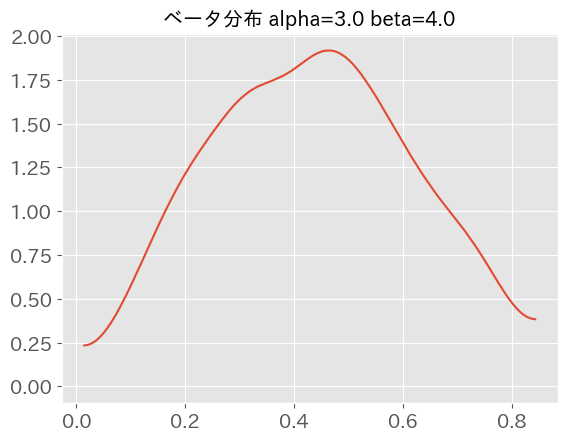

In [51]:
# Sampling と結果分析
with model_beta:
    prior_samples_beta = pm.sample_prior_predictive(random_seed=42)

# Sample値抽出
p_sample_beta = prior_samples_beta['prior']['p'].values
# 先頭100個のみ出力
print(p_sample_beta[:, :100])

# Sampling 結果の可視化
ax = az.plot_dist(p_sample_beta)
ax.set_title(f'ベータ分布 alpha={alpha} beta={beta}')
plt.show()

今回の Sample値はそれぞれが確率値。具体的な値が 0 から 1  の範囲に収まっていることで、その点が確認できる。

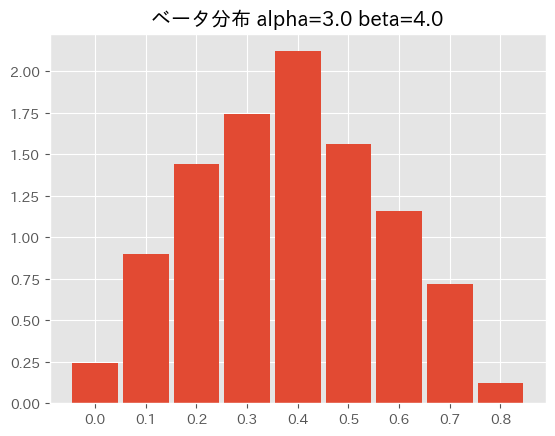

In [53]:
# Sample-data の Histogram表示
bins = np.arange(0, 1.0, 0.1)
ax = az.plot_dist(p_sample_beta, kind='hist', hist_kwargs={'bins': bins})
ax.set_title(f'ベータ分布 alpha={alpha} beta={beta}')
plt.show()

In [54]:
# Sampling結果の統計情報表示
summary_beta = az.summary(p_sample_beta, kind='stats')
display(summary_beta)

,mean,sd,hdi_3%,hdi_97%
x,0.433,0.181,0.12,0.76


$(\alpha = 3.0, \beta = 4.0)$でのベータ分布の理論平均値: $3 / (3 + 4) = 3/7 = 0.4285...$ とSamplingの実行結果とほぼ一致していることが確認とれた。

Sampling: [p]


[[0.42330735 0.54035334 0.50875029 0.48199994 0.5097184  0.30994798
  0.36314643 0.40343135 0.42028356 0.43197266 0.53530931 0.32355796
  0.47381802 0.39567475 0.38118253 0.37936345 0.42108834 0.38101055
  0.39768921 0.49092269 0.53297592 0.4228698  0.34116122 0.28715128
  0.35100545 0.46102789 0.32905419 0.42187683 0.34354498 0.45166118
  0.38709281 0.40786948 0.47610241 0.41450615 0.49536889 0.45391551
  0.33580415 0.52349565 0.44574013 0.28114562 0.4280533  0.45614829
  0.42399465 0.58573177 0.49421673 0.37143174 0.38017472 0.49337712
  0.45772755 0.42760024 0.41201735 0.36934856 0.56745097 0.50864534
  0.45250566 0.32428311 0.47241999 0.39642411 0.35396347 0.42694125
  0.52628781 0.43163134 0.42881517 0.33573918 0.38026926 0.35507469
  0.41261812 0.36525608 0.27304036 0.42058491 0.31740478 0.3476402
  0.42160523 0.46937826 0.38609759 0.33778594 0.48352019 0.3151148
  0.35352122 0.3962185  0.41079709 0.24194236 0.42760528 0.34514101
  0.38695381 0.3387648  0.44485352 0.42426836 0.32

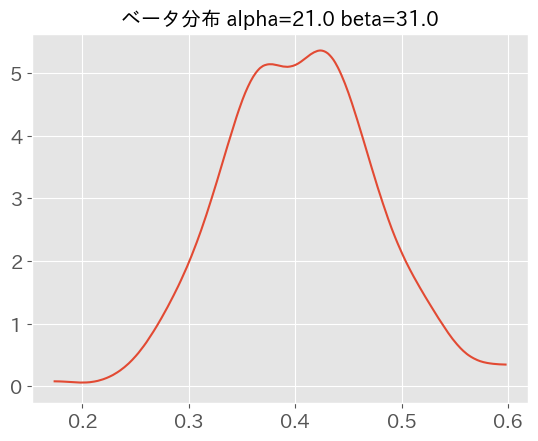

In [57]:
# 確率 Model 定義と Sampling 結果分析
alpha = 20.0 + 1.0
beta = 30.0 + 1.0

model_beta_2 = pm.Model()
with model_beta_2:
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # Sampling
    prior_samples_beta_2 = pm.sample_prior_predictive(random_seed=42)

# Sample値を抽出
p_sample_beta_2 = prior_samples_beta_2['prior']['p'].values
print(p_sample_beta_2[:, :100])  # 先頭100個のみ出力

# Sampling結果の可視化
ax = az.plot_dist(p_sample_beta_2)
ax.set_title(f'ベータ分布 alpha={alpha} beta={beta}')
plt.show()

$(\alpha=2, \beta=3)$のベータ分布と比較すると $p$ の値が 0.3 と 0.5 の間である確率がより高まっていることがわかる。

### ベータ分布と一様分布の関係
$$
f(p) = C \cdot p^{1-1} (1-p)^{1-1}
$$

というベータ分布の式は $f(p)$ が定数になる。これは「１回も施行していない特殊な二項分布に対応した確率値に対応した確率値の確率分布は一様分布である」ことを意味する。
つまり、ベータ分布の特殊なケースが一様分布であるということである。

## 半正規分布（pm.HalfNormal Class）
- 事前分布に対して「正の値のみをとる」という条件を満たす確率分布の確率変数が望ましい、という制約を満たす確率変数を定義する時によく用いられる。
- Bayes推論で確率 Model を構築するにあたって **事前分布として便宜上用いられる確率分布** ということができる。（実世界との対応づけは意識不要。）

#### 半正規分布の確率密度関数
$$
f(x) = \sqrt{\frac{2}{\pi\sigma^2}} \exp \left(- \frac{x^2}{2\sigma^2} \right)
$$
半分に切り取る前の正規分布は、$y$軸に関する対称性を保つために平均$\mu = 0$の制約がつく。そのため、Parameter は標準偏差$\sigma$の値のみとなる。

In [58]:
# 半正規分布の確率 Model の定義

# Parameter
sigma = 1.0

model_half_norm = pm.Model()
with model_half_norm:
    # pm.HalfNormal: 半正規分布
    # sigma: 標準偏差
    x = pm.HalfNormal('x', sigma=sigma)

Sampling: [x]


array([[0.41832997, 0.60557617, 0.02878786, 1.084246  , 1.46422098,
        0.29072736, 1.33075642, 0.03472346, 0.28041847, 0.10749307,
        1.92080086, 1.57864499, 1.00595719, 0.45121505, 0.59343367,
        0.09382112, 1.85195867, 0.25590475, 0.28298637, 0.415816  ,
        1.08877401, 1.96729165, 0.88737846, 1.32823784, 0.13157981,
        0.36196929, 0.7820311 , 0.28266399, 1.00595013, 0.01851214,
        1.24315953, 2.60337585, 0.15139223, 0.51553062, 0.2196374 ,
        0.40234591, 1.36128828, 0.74287737, 0.93685218, 0.17547031,
        1.52520418, 0.09821447, 1.16490357, 0.52358791, 1.06559789,
        0.31079113, 0.5559524 , 0.09963476, 0.25769078, 1.58951869,
        1.81491229, 0.53617305, 1.27138979, 0.55403891, 1.72433064,
        0.31178569, 0.06331837, 1.38212765, 0.58472813, 0.50975014,
        0.2513335 , 0.40621724, 0.8656376 , 0.53392518, 0.03877829,
        1.14263416, 0.46350628, 2.26692259, 0.5287392 , 0.32461586,
        0.1544165 , 0.81960771, 1.20293573, 0.09

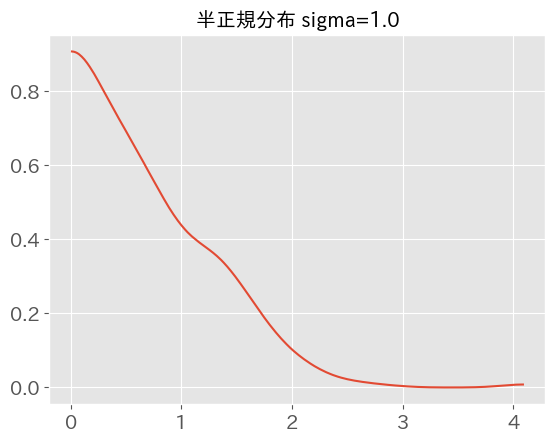

In [63]:
# Sampling と結果分析
with model_half_norm:
    # Sampling
    prior_samples_half_norm = pm.sample_prior_predictive(random_seed=42)
    
# Sample値抽出
x_samples_half_norm = prior_samples_half_norm['prior']['x'].values
# 先頭100個のみ出力
display(x_samples_half_norm[:, :100])

# Sampling結果の可視化
ax = az.plot_dist(x_samples_half_norm)
ax.set_title(f'半正規分布 sigma={sigma}')
plt.show()


- Sample値が全て正の値になっている。
- Graph の形状も正規分布の正の領域片側だけを取り出した形の確率分布になっている。